# IDVE Assignment 2
## NBA 2022-23 Season Statistics Analysis

**Student Name:** [Your Name]
**Student ID:** [Your ID]
**Date:** [Date]


## Setup and Imports

Import all necessary libraries for data analysis and visualization.

In [1]:
# Data manipulation and analysis
import time
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive visualizations
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import joblib

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


## 1. Data Loading and Initial Exploration

Load the NBA 2022-23 statistics dataset and perform initial exploration.

In [2]:
# Load the dataset
df = pd.read_csv('nba_2022-23_stats.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of players: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset shape: (467, 52)
Number of players: 467
Number of features: 52


In [3]:
# Display first few rows
df.head(10)

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,4.9,11.4,0.427,5.1,8.8,0.579,0.614,4.6,5.0,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,1941,24.1,0.656,0.564,0.248,2.3,16.8,9.7,30.0,1.3,0.9,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,0.408,1.0,3.2,0.303,3.1,6.7,0.459,0.457,2.3,3.3,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,755,13.6,0.498,0.322,0.334,2.1,11.4,6.8,35.3,1.8,1.4,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,0.436,1.2,3.9,0.311,4.7,9.7,0.487,0.481,2.8,4.3,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,2126,16.1,0.513,0.289,0.317,4.7,16.5,10.8,38.6,1.7,1.3,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,2.2,6.9,0.321,8.9,15.3,0.580,0.549,4.6,5.9,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,1954,23.9,0.583,0.309,0.268,3.7,20.8,12.5,33.5,1.2,1.4,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,0.560,2.0,4.9,0.404,8.3,13.4,0.617,0.614,6.5,7.1,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,1672,25.9,0.677,0.267,0.387,1.2,19.5,10.5,24.5,1.0,3.4,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
5,5,Bradley Beal,43279250,SG,29,WAS,50,50,33.5,8.9,17.6,0.506,1.s6,4.4,0.365,7.3,13.2,0.552,0.551,3.8,4.6,0.842,0.8,3.1,3.9,5.4,0.9,0.7,2.9,2.1,23.2,1673,19.7,0.593,0.249,0.260,2.8,9.9,6.5,26.6,1.3,1.7,12.9,29.2,2.2,1.2,3.4,0.099,2.9,-1.2,1.8,1.6
6,6,Kawhi Leonard,42492492,SF,31,LAC,52,50,33.6,8.6,16.8,0.512,2.0,4.8,0.416,6.6,11.9,0.551,0.572,4.7,5.4,0.871,1.1,5.4,6.5,3.9,1.4,0.5,1.7,1.6,23.8,1748,23.9,0.623,0.287,0.320,3.7,17.8,10.8,19.6,2.0,1.4,8.1,27.0,4.9,2.2,7.1,0.194,5.1,0.9,6.1,3.5
7,7,Paul George,42492492,SF,32,LAC,56,56,34.6,8.2,17.9,0.457,2.8,7.6,0.371,5.4,10.3,0.521,0.536,4.6,5.3,0.871,0.8,5.3,6.1,5.1,1.5,0.4,3.1,2.8,23.8,1939,19.6,0.588,0.424,0.293,2.6,17.0,9.9,24.2,2.1,0.9,13.4,29.5,2.3,2.3,4.6,0.114,2.4,0.3,2.8,2.3
8,8,Giannis Antetokounmpo,42492492,PF,28,MIL,63,63,32.1,11.2,20.3,0.553,0.7,2.7,0.275,10.5,17.6,0.596,0.572,7.9,12.3,0.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,2024,29.0,0.605,0.134,0.604,7.3,30.0,19.1,33.2,1.2,2.1,13.2,38.8,4.9,3.7,8.6,0.204,5.8,2.7,8.5,5.4
9,9,Damian Lillard,42492492,PG,32,POR,58,58,36.3,9.6,20.7,0.463,4.2,11.3,0.371,5.4,9.4,0.574,0.564,8.8,9.6,0.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,2107,26.7,0.645,0.547,0.464,2.4,12.8,7.6,35.0,1.2,0.8,11.7,33.8,8.2,0.8,9.0,0.205,8.3,-1.2,7.1,4.9


In [4]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     467 non-null    int64  
 1   Player Name    467 non-null    object 
 2   Salary         467 non-null    int64  
 3   Position       467 non-null    object 
 4   Age            467 non-null    int64  
 5   Team           467 non-null    object 
 6   GP             467 non-null    int64  
 7   GS             467 non-null    int64  
 8   MP             467 non-null    float64
 9   FG             467 non-null    float64
 10  FGA            467 non-null    float64
 11  FG%            466 non-null    float64
 12  3P             467 non-null    object 
 13  3PA            467 non-null    float64
 14  3P%            454 non-null    float64
 15  2P             467 non-null    float64
 16  2PA            467 non-null    float64
 17  2P%            463 non-null    float64
 18  eFG%      

In [5]:
# Display statistical summary
df.describe()

,Unnamed: 0,Salary,Age,GP,GS,MP,FG,FGA,FG%,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,467.000000,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000,467.000000,454.000000,467.000000,467.000000,463.000000,466.000000,467.000000,467.000000,444.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000,466.000000,466.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,233.000000,8.416599e+06,25.820128,48.233405,22.650964,19.871306,3.351392,7.117773,0.465009,2.792719,0.325090,2.356531,4.325268,0.533464,0.534266,1.435546,1.848394,0.753489,0.866809,2.662099,3.528051,2.107709,0.610493,0.379015,1.114133,1.702784,9.129979,1109.676660,13.279657,0.563024,0.403655,0.249749,5.243469,14.884582,10.061456,13.563812,1.523555,1.832120,12.735974,18.425910,1.208351,1.120557,2.328908,0.081771,-1.344968,-0.087152,-1.432548,0.539829
std,134.955548,1.070812e+07,4.275113,24.807740,27.094577,9.548684,2.457836,5.020700,0.109547,2.260794,0.131624,1.989397,3.571280,0.136046,0.104584,1.568500,1.896352,0.148659,0.746976,1.707984,2.277160,1.957517,0.399083,0.364387,0.830051,0.776957,6.906006,827.367432,6.230049,0.100741,0.219066,0.186855,4.332254,6.478093,4.671516,8.630677,1.368860,2.524336,7.198533,5.909528,1.765160,0.980478,2.533094,0.088089,3.578193,2.243437,4.925175,1.172960
min,0.000000,5.849000e+03,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-20.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.100000,-1.900000,0.000000,-1.600000,-0.517000,-22.500000,-10.400000,-26.500000,-1.300000
25%,116.500000,1.782621e+06,23.000000,31.000000,1.000000,12.500000,1.600000,3.300000,0.417000,1.000000,0.288000,0.900000,1.800000,0.487000,0.493750,0.500000,0.600000,0.691000,0.400000,1.400000,1.900000,0.800000,0.300000,0.100000,0.500000,1.200000,4.100000,341.000000,10.100000,0.524000,0.268250,0.143250,2.100000,10.700000,6.750000,7.450000,1.000000,0.700000,9.500000,14.300000,0.000000,0.300000,0.300000,0.047000,-2.900000,-0.900000,-3.300000,-0.100000
50%,233.000000,3.722040e+06,25.000000,55.000000,8.000000,19.200000,2.700000,5.800000,0.455000,2.400000,0.344500,1.700000,3.200000,0.537000,0.537500,0.900000,1.200000,0.769000,0.700000,2.300000,3.000000,1.400000,0.600000,0.300000,0.900000,1.700000,7.100000,990.000000,13.000000,0.567000,0.409000,0.226000,3.800000,13.500000,9.000000,11.200000,1.400000,1.200000,11.900000,17.600000,0.600000,0.900000,1.500000,0.087000,-1.300000,-0.100000,-1.300000,0.100000
75%,349.500000,1.063354e+07,29.000000,68.500000,45.500000,28.300000,4.300000,9.400000,0.507500,4.150000,0.387000,3.300000,5.850000,0.594500,0.578000,1.850000,2.350000,0.844000,1.100000,3.500000,4.500000,2.900000,0.800000,0.500000,1.500000,2.200000,11.700000,1842.000000,16.350000,0.610000,0.545750,0.323750,7.100000,18.350000,12.500000,18.000000,1.700000,2.350000,15.000000,21.150000,1.800000,1.800000,3.550000,0.129500,0.450000,0.800000,0.600000,0.800000
max,466.000000,4.807001e+07,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,11.400000,1.000000,10.500000,17.800000,1.000000,1.000000,10.000000,12.300000,1.000000,5.100000,9.600000,12.500000,10.700000,3.000000,2.500000,4.100000,5.000000,33.100000,2963.000000,65.600000,1.064000,1.000000,2.000000,28.800000,55.400000,29.600000,47.600000,24.200000,44.100000,100.000000,52.500000,9.600000,4.800000,12.600000,0.626000,17.000000,32.700000,48.600000,6.400000


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
FG%      1
3P%     13
2P%      4
eFG%     1
FT%     23
TS%      1
3PAr     1
FTr      1
dtype: int64


In [7]:
# Display column names for reference
print("Available columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Available columns:
 1. Unnamed: 0
 2. Player Name
 3. Salary
 4. Position
 5. Age
 6. Team
 7. GP
 8. GS
 9. MP
10. FG
11. FGA
12. FG%
13. 3P
14. 3PA
15. 3P%
16. 2P
17. 2PA
18. 2P%
19. eFG%
20. FT
21. FTA
22. FT%
23. ORB
24. DRB
25. TRB
26. AST
27. STL
28. BLK
29. TOV
30. PF
31. PTS
32. Total Minutes
33. PER
34. TS%
35. 3PAr
36. FTr
37. ORB%
38. DRB%
39. TRB%
40. AST%
41. STL%
42. BLK%
43. TOV%
44. USG%
45. OWS
46. DWS
47. WS
48. WS/48
49. OBPM
50. DBPM
51. BPM
52. VORP


## 2. Data Cleaning and Preprocessing

Handle missing values, data types, and prepare data for analysis.

This section documents all data cleaning operations performed on the NBA 2022-23 statistics dataset to ensure data quality and prepare it for analysis.

### Cleaning Steps Performed

#### 1. **Removed Redundant Index Column**
**Column:** `Unnamed: 0`

**Reason:** This column was an auto-generated index from the CSV file that duplicates the DataFrame's built-in index, providing no analytical value.

#### 2. **Fixed Data Type Issues in `3P` Column**
**Column:** `3P` (3-Point Field Goals Made)

**Problem:** The column contained string values with 's' suffix (e.g., '1.s6' instead of '1.6'), preventing numeric operations.

**Solution:** Removed 's' characters and converted to numeric type.

**Example:**
```
Before: '1.s6' (string)
After:  1.6 (float)
for Bradley Beal
```
#### 3. **Handled Missing Percentage Values by Filling with Zero**

#### TODO: Leave no attempts as NaN
**Columns:** `3P%`, `FT%`, `2P%`, `FG%`, `eFG%`, `TS%`, `3PAr`, `FTr`

**Problem:** Missing values in shooting percentage columns (23 missing in `FT%`, 13 in `3P%`, etc.)

**Solution:** Replaced all `NaN` values with `0`.

**Reasoning:**
- **For shooting percentages** (`3P%`, `FT%`, `2P%`, `FG%`): Missing values typically occur when a player had zero attempts. A 0% shooting percentage is mathematically correct when attempts = 0 (you can't make shots you don't take).
  
- **For efficiency metrics** (`eFG%`, `TS%`): These are calculated metrics. A value of 0 indicates no offensive production rather than "unknown," which is appropriate for players with minimal playing time.

- **For ratio metrics** (`3PAr`, `FTr`): These represent the rate of 3-point attempts or free throw attempts relative to field goal attempts. Zero indicates the player didn't utilize that aspect of offense.

**Example:**
```python
# Player with no 3-point attempts
Player: Steven Adams
3PA: 0.0 → 3P%: NaN → After cleaning: 0.0
Interpretation: Didn't attempt 3-pointers, so 0% is accurate

# Player with attempts but missing data (rare)
Player: Example Player
3PA: 5.2 → 3P%: NaN → After cleaning: 0.0
Interpretation: Potentially misleading - might need investigation
```

**Limitation:** This approach assumes missing percentages indicate zero attempts. If data is missing due to recording errors for players who did attempt shots, this could create inaccuracies.

#### 4. **Ensured Proper Data Types for All Numeric Columns**
**Columns:** All columns except `Player Name`, `Position`, `Team`

**Problem:** Some numeric columns were stored as objects (strings) instead of numeric types.

**Solution:** Converted all non-categorical columns to numeric types, with error handling for invalid values.

**Reason:** Numeric operations (mean, correlation, visualization) require proper numeric data types. String values would cause errors or be excluded from calculations.

**Example:**
```
Before: '34.7' (object/string)
After:  34.7 (float64)
```



In [8]:
# 1. Remove index column
df = df.drop('Unnamed: 0', axis=1)

# 2. Fix data type issues
df['3P'] = pd.to_numeric(df['3P'].astype(str).str.replace('s', ''), errors='coerce')

# 3. Handle missing percentage values
percentage_cols = ['3P%', 'FT%', '2P%', 'FG%', 'eFG%', 'TS%', '3PAr', 'FTr']
for col in percentage_cols:
    df[col] = df[col].fillna(0)

# 4. Ensure numeric columns are proper type
numeric_cols = df.select_dtypes(include=['object']).columns
for col in numeric_cols:
    if col not in ['Player Name', 'Position', 'Team']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 5. Check final data quality
print("Missing values after cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values after cleaning:
Series([], dtype: int64)


In [9]:
# Check for players with very low playing time
print("=" * 60)
print("PLAYING TIME ANALYSIS")
print("=" * 60)
print(f"\nPlayers with < 100 total minutes: {(df['Total Minutes'] < 100).sum()}")
print(f"Players with < 10 games played: {(df['GP'] < 10).sum()}")
print(f"Players with < 5 MPG: {(df['MP'] < 5).sum()}")

# Show distribution of extreme values
print("\n" + "=" * 60)
print("EXTREME VALUES CHECK")
print("=" * 60)
print("\nPlayers with 100% shooting percentages (small samples):")
perfect_shooters = df[(df['FG%'] == 1.0) | (df['FT%'] == 1.0) | (df['3P%'] == 1.0)]
print(perfect_shooters[['Player Name', 'GP', 'Total Minutes', 'FG%', 'FT%', '3P%']].head(10))

print("\nPlayers with negative PER:")
print(df[df['PER'] < 0][['Player Name', 'GP', 'Total Minutes', 'PER']].head(10))

PLAYING TIME ANALYSIS

Players with < 100 total minutes: 64
Players with < 10 games played: 62
Players with < 5 MPG: 21

EXTREME VALUES CHECK

Players with 100% shooting percentages (small samples):
         Player Name  GP  Total Minutes    FG%    FT%    3P%
105      Danny Green  11            138  0.449  1.000  0.432
114   DeAndre Jordan  39            586  0.765  0.458  1.000
258  Markieff Morris  35            355  0.409  1.000  0.394
292      Bryn Forbes  25            268  0.361  1.000  0.304
312     Tony Bradley  12             33  0.500  1.000  0.600
349    Nick Richards  65           1217  0.629  0.749  1.000
362      Isaiah Todd   6             61  0.158  1.000  0.100
381      Noah Vonleh  23            171  0.458  1.000  0.250
383      Sam Merrill   5             59  0.409  1.000  0.278
384    Tyrese Martin  16             66  0.391  1.000  0.143

Players with negative PER:
          Player Name  GP  Total Minutes   PER
254      Joe Wieskamp   9             50  -0.4
356   Le

## TODO: Test autoencoder with the filtered players included

In [10]:
# Additional Cleaning - Minimal filtering approach
print("=" * 60)
print("FILTERING ANALYSIS")
print("=" * 60)

# Define minimal thresholds
MIN_GAMES = 5
MIN_TOTAL_MINUTES = 25

# Show what filtering will do
print(f"\nOriginal dataset: {len(df)} players")
print(f"Filter criteria: GP >= {MIN_GAMES} AND Total Minutes >= {MIN_TOTAL_MINUTES}")

# Apply filter
df_filtered = df[(df['GP'] >= MIN_GAMES) & (df['Total Minutes'] >= MIN_TOTAL_MINUTES)].copy()

removed_count = len(df) - len(df_filtered)
print(f"\n✅ Filtered dataset: {len(df_filtered)} players")
print(f"❌ Removed: {removed_count} players ({removed_count/len(df)*100:.1f}%)")

# Show who was removed (for transparency)
if removed_count > 0:
    removed_players = df[~df.index.isin(df_filtered.index)]
    print(f"\nExamples of removed players (very limited playing time):")
    print(removed_players[['Player Name', 'Team', 'GP', 'Total Minutes', 'MP', 'PTS']].head(10))

FILTERING ANALYSIS

Original dataset: 467 players
Filter criteria: GP >= 5 AND Total Minutes >= 25

✅ Filtered dataset: 436 players
❌ Removed: 31 players (6.6%)

Examples of removed players (very limited playing time):
                 Player Name Team  GP  Total Minutes    MP  PTS
221            Dylan Windler  CLE   3             10   3.3  1.7
247           Sterling Brown  LAL   4             24   6.0  0.0
365          Marko Simonovic  CHI   7             20   2.9  0.9
401  Michael Carter-Williams  ORL   4             44  11.0  4.3
403             Trevor Keels  NYK   3              8   2.7  1.0
404           Dereon Seabron  NOP   5             12   2.4  0.8
406        Mfiondu Kabengele  BOS   4             36   9.0  1.5
408             Malcolm Hill  CHI   5              9   1.8  1.0
413              Darius Days  HOU   4             25   6.3  3.8
428             Chima Moneke  SAC   2              8   4.0  1.0


#### Data Quality Verification

After cleaning, the dataset has:
- ✅ **Zero missing values** in all columns
- ✅ **Proper data types** (numeric columns as float64/int64, categorical as object)
- ✅ **467 players** with complete statistical records
- ✅ **51 features** ready for analysis

### TODO: try -> Feature Engineering and Preprocessing for Machine Learning

Prepare the dataset for modeling by removing identifiers, applying transformations, splitting data, and scaling features.

In [14]:
# ================================================================================
# PREPROCESSING FOR MACHINE LEARNING
# ================================================================================

# Configuration
RANDOM_SEED = 42
LOG_TRANSFORM_COLS = ['Salary']  # Columns to apply log transformation
TEST_SIZE = 0.15
VAL_SIZE = 0.15

print("=" * 80)
print("PREPROCESSING CONFIGURATION")
print("=" * 80)
print(f"Random Seed:            {RANDOM_SEED}")
print(f"Log Transform Columns:  {LOG_TRANSFORM_COLS}")
print(f"Test Split:             {TEST_SIZE * 100}%")
print(f"Validation Split:       {VAL_SIZE * 100}%")
print(f"Training Split:         {(1 - TEST_SIZE - VAL_SIZE * (1 - TEST_SIZE)) * 100:.1f}%")

# Step 1: Remove identifier columns (not needed for modeling)
print("\n" + "=" * 80)
print("STEP 1: REMOVE IDENTIFIER COLUMNS")
print("=" * 80)

df_model = df_filtered.copy()
identifier_cols = ['Player Name', 'Team', 'Position']
drop_cols = [c for c in identifier_cols if c in df_model.columns]

if drop_cols:
    print(f"Dropping columns: {drop_cols}")
    df_model = df_model.drop(columns=drop_cols)
    print(f"✅ Removed {len(drop_cols)} identifier columns")
else:
    print("⚠️ No identifier columns found to remove")

# Step 2: Keep only numeric columns
print("\n" + "=" * 80)
print("STEP 2: SELECT NUMERIC FEATURES")
print("=" * 80)

numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
X = df_model[numeric_cols].copy()

print(f"Selected {len(numeric_cols)} numeric features:")
print(f"Features: {', '.join(numeric_cols[:10])}...")
print(f"Shape: {X.shape}")

# Step 3: Apply log transformation (for skewed features like Salary)
print("\n" + "=" * 80)
print("STEP 3: APPLY LOG TRANSFORMATION")
print("=" * 80)

for col in LOG_TRANSFORM_COLS:
    if col in X.columns:
        original_mean = X[col].mean()
        X[col] = np.log1p(X[col].clip(lower=0))
        transformed_mean = X[col].mean()
        print(f"✅ Log-transformed '{col}':")
        print(f"   Original mean: {original_mean:,.2f}")
        print(f"   Transformed mean: {transformed_mean:.4f}")
    else:
        print(f"⚠️ Column '{col}' not found, skipping")

# Step 4: Train/Validation/Test Split
print("\n" + "=" * 80)
print("STEP 4: TRAIN/VALIDATION/TEST SPLIT")
print("=" * 80)

np.random.seed(RANDOM_SEED)

# First split: separate test set
X_train_full, X_test = train_test_split(
    X, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_SEED, 
    shuffle=True
)

# Second split: separate validation from training
val_relative = VAL_SIZE / (1.0 - TEST_SIZE)
X_train, X_val = train_test_split(
    X_train_full, 
    test_size=val_relative, 
    random_state=RANDOM_SEED, 
    shuffle=True
)

print(f"Train set:      {X_train.shape[0]:4d} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]:4d} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:       {X_test.shape[0]:4d} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Total:          {len(X):4d} samples")
print(f"\n✅ Data split completed with random seed {RANDOM_SEED}")

# Step 5: Feature Scaling (Standardization)
print("\n" + "=" * 80)
print("STEP 5: FEATURE SCALING (STANDARDIZATION)")
print("=" * 80)

scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("StandardScaler fitted on training data")
print(f"Mean values (first 5 features): {scaler.mean_[:5]}")
print(f"Std values (first 5 features):  {scaler.scale_[:5]}")
print(f"\n✅ All splits scaled to mean=0, std=1")

# Save scaler for later use
joblib.dump(scaler, 'scaler.joblib')
print(f"\n💾 Scaler saved to 'scaler.joblib'")

# Summary
print("\n" + "=" * 80)
print("PREPROCESSING COMPLETE")
print("=" * 80)
print(f"✅ {len(numeric_cols)} numeric features prepared")
print(f"✅ {len(LOG_TRANSFORM_COLS)} features log-transformed")
print(f"✅ Data split into train/val/test sets")
print(f"✅ Features standardized (mean=0, std=1)")
print(f"\nData is ready for machine learning models!")
print("=" * 80)

PREPROCESSING CONFIGURATION
Random Seed:            42
Log Transform Columns:  ['Salary']
Test Split:             15.0%
Validation Split:       15.0%
Training Split:         72.2%

STEP 1: REMOVE IDENTIFIER COLUMNS
Dropping columns: ['Player Name', 'Team', 'Position']
✅ Removed 3 identifier columns

STEP 2: SELECT NUMERIC FEATURES
Selected 48 numeric features:
Features: Salary, Age, GP, GS, MP, FG, FGA, FG%, 3P, 3PA...
Shape: (436, 48)

STEP 3: APPLY LOG TRANSFORMATION
✅ Log-transformed 'Salary':
   Original mean: 8,980,252.31
   Transformed mean: 15.2814

STEP 4: TRAIN/VALIDATION/TEST SPLIT
Train set:       304 samples (69.7%)
Validation set:   66 samples (15.1%)
Test set:         66 samples (15.1%)
Total:           436 samples

✅ Data split completed with random seed 42

STEP 5: FEATURE SCALING (STANDARDIZATION)
StandardScaler fitted on training data
Mean values (first 5 features): [15.29710099 26.08881579 51.50657895 24.03947368 20.42697368]
Std values (first 5 features):  [ 1.30792

#### Preprocessing Summary

The preprocessing pipeline has successfully prepared the data for machine learning:

**Steps Completed:**
1. ✅ **Removed identifiers** - Player Name, Team, Position (not needed for modeling)
2. ✅ **Selected numeric features** - 48 features ready for analysis
3. ✅ **Log transformation** - Applied to Salary (reduces skewness)
4. ✅ **Data splitting** - 70% train, 15% validation, 15% test
5. ✅ **Standardization** - All features scaled to mean=0, std=1

**Output Variables:**
- `X_train_scaled`, `X_val_scaled`, `X_test_scaled` - Preprocessed data ready for modeling
- `X_train`, `X_val`, `X_test` - Original (unscaled) splits for reference
- `X` - Full dataset with transformations applied
- `scaler` - Fitted StandardScaler object saved to `scaler.joblib`

This preprocessed data can now be used by any machine learning model (autoencoder, PCA, clustering, etc.).

## 3. Autoencoder

### Overview
This section uses a PyTorch autoencoder to learn a compressed representation of NBA player statistics and detect statistical anomalies.

### Autoencoder Training

In [11]:
# ----------------- Config -----------------
RANDOM_SEED = 42
BATCH_SIZE = 16
EPOCHS = 500
LR = 5e-5
LATENT_DIM = 2
HIDDEN_DIMS = [128, 96, 64, 32]
LOG_TRANSFORM = ['Salary']  # set to [] to disable
TEST_SIZE = 0.15
VAL_SIZE = 0.15
MODEL_OUT = 'ae_model.pth'
SCALER_OUT = 'scaler.joblib'
LATENTS_OUT = 'latent_vectors.npy'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# ------------------------------------------

torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Pick dataframe
try:
    df_model = df_filtered.copy()
    print('Using df_filtered for modeling')
except NameError:
    try:
        df_model = df.copy()
        print('Using df for modeling')
    except NameError:
        raise RuntimeError('No dataframe available in notebook (df_filtered or df).')

# Drop identifiers
drop_cols = [c for c in ['Player Name', 'Team', 'Position'] if c in df_model.columns]
if drop_cols:
    print('Dropping columns:', drop_cols)
    df_model = df_model.drop(columns=drop_cols)

# Keep numeric columns
numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns:', numeric_cols)
X = df_model[numeric_cols].copy()

# Optional log transform
for c in LOG_TRANSFORM:
    if c in X.columns:
        X[c] = np.log1p(X[c].clip(lower=0))

# Train/val/test splits
X_train_full, X_test = train_test_split(X, test_size=TEST_SIZE, random_state=RANDOM_SEED, shuffle=True)
val_relative = VAL_SIZE / (1.0 - TEST_SIZE)
X_train, X_val = train_test_split(X_train_full, test_size=val_relative, random_state=RANDOM_SEED, shuffle=True)
print(f'Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}')

# Scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)
joblib.dump(scaler, SCALER_OUT)
print('Saved scaler to', SCALER_OUT)

# DataLoaders
def to_loader(arr, batch_size=BATCH_SIZE, shuffle=True):
    t = torch.tensor(arr, dtype=torch.float32)
    ds = TensorDataset(t, t)
    return DataLoader(ds, batch_size=batch_size, shuffle=shuffle)

train_loader = to_loader(X_train_s, BATCH_SIZE, shuffle=True)
val_loader = to_loader(X_val_s, BATCH_SIZE, shuffle=False)
test_loader = to_loader(X_test_s, BATCH_SIZE, shuffle=False)

# Model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128,64], latent_dim=8):
        super().__init__()
        enc = []
        prev = input_dim
        for h in hidden_dims:
            enc += [nn.Linear(prev, h), nn.ReLU(inplace=True)]
            prev = h
        enc.append(nn.Linear(prev, latent_dim))
        self.encoder = nn.Sequential(*enc)
        dec = []
        prev = latent_dim
        for h in reversed(hidden_dims):
            dec += [nn.Linear(prev, h), nn.ReLU(inplace=True)]
            prev = h
        dec.append(nn.Linear(prev, input_dim))
        self.decoder = nn.Sequential(*dec)

    def forward(self, x):
        z = self.encoder(x)
        xrec = self.decoder(z)
        return xrec

input_dim = X_train_s.shape[1]
model_2d = Autoencoder(input_dim=input_dim, hidden_dims=HIDDEN_DIMS, latent_dim=LATENT_DIM)
optimizer = torch.optim.Adam(model_2d.parameters(), lr=LR)
criterion = nn.MSELoss(reduction='mean')

# Training
best_val = float('inf')
patience = 30
no_improve = 0
start = time.time()
for epoch in range(1, EPOCHS+1):
    model_2d.train()
    train_losses = []
    for xb, _ in train_loader:
        xb = xb.to(DEVICE)
        optimizer.zero_grad()
        xr = model_2d(xb)
        loss = criterion(xr, xb)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    train_loss = np.mean(train_losses)

    model_2d.eval()
    val_losses = []
    with torch.no_grad():
        for xb, _ in val_loader:
            xb = xb.to(DEVICE)
            xr = model_2d(xb)
            val_losses.append(criterion(xr, xb).item())
    val_loss = np.mean(val_losses)
    print(f'Epoch {epoch:03d} - train {train_loss:.6f} val {val_loss:.6f}')

    if val_loss < best_val - 1e-6:
        best_val = val_loss
        no_improve = 0
        torch.save(model_2d.state_dict(), MODEL_OUT)
    else:
        no_improve += 1
        if no_improve >= patience:
            print('Early stopping')
            break

print('Training time (s):', time.time() - start)
print('Best val loss:', best_val)
print('Saved best model to', MODEL_OUT)

# Evaluate on test
model_2d.load_state_dict(torch.load(MODEL_OUT, map_location=DEVICE))
model_2d.eval()
all_err = []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(DEVICE)
        xr = model_2d(xb)
        mse = torch.mean((xb - xr) ** 2, dim=1).cpu().numpy()
        all_err.append(mse)
all_err = np.concatenate(all_err)
print('Test recon err mean/std:', all_err.mean(), all_err.std())

# Show top anomalies with player names (map back to original df index)
n_top = 10
top_idx = np.argsort(-all_err)[:n_top]
# Map test positions to original indexes
test_idx = X_test.index.to_numpy()
print('Top anomalies (reconstruction error):')
for i, tidx in enumerate(top_idx, 1):
    row_index = test_idx[tidx]
    name = None
    # if original df had Player Name column, try to get it from original df
    try:
        original_df = df_filtered if 'df_filtered' in globals() else df
        if 'Player Name' in original_df.columns:
            name = original_df.loc[row_index, 'Player Name']
    except Exception:
        name = None
    print(f'{i}. index {row_index} name={name} err={all_err[tidx]:.6f}')

# Produce latent vectors for whole dataset and save
with torch.no_grad():
    X_all_s = scaler.transform(X)
    z_all = []
    for i in range(0, len(X_all_s), BATCH_SIZE):
        batch = torch.tensor(X_all_s[i:i+BATCH_SIZE], dtype=torch.float32).to(DEVICE)
        z = model_2d.encoder(batch).cpu().numpy()
        z_all.append(z)
    z_all = np.vstack(z_all)
np.save(LATENTS_OUT, z_all)
print('Saved latent vectors to', LATENTS_OUT)

Using df_filtered for modeling
Dropping columns: ['Player Name', 'Team', 'Position']
Numeric columns: ['Salary', 'Age', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Total Minutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
Train: (304, 48), Val: (66, 48), Test: (66, 48)
Saved scaler to scaler.joblib


Epoch 001 - train 1.003689 val 0.828056
Epoch 002 - train 1.003367 val 0.827877
Epoch 003 - train 1.003074 val 0.827650
Epoch 004 - train 1.002692 val 0.827255
Epoch 005 - train 1.002249 val 0.826883
Epoch 006 - train 1.001638 val 0.826333
Epoch 007 - train 1.000732 val 0.825489
Epoch 008 - train 0.999321 val 0.824156
Epoch 009 - train 0.997098 val 0.821817
Epoch 010 - train 0.993234 val 0.818146
Epoch 011 - train 0.987038 val 0.812064
Epoch 012 - train 0.977113 val 0.801911
Epoch 013 - train 0.959956 val 0.783271
Epoch 014 - train 0.927507 val 0.752171
Epoch 015 - train 0.873878 val 0.700401
Epoch 016 - train 0.796134 val 0.635476
Epoch 017 - train 0.714418 val 0.587019
Epoch 018 - train 0.657072 val 0.553900
Epoch 019 - train 0.621220 val 0.536636
Epoch 020 - train 0.602227 val 0.526579
Epoch 021 - train 0.591095 val 0.519784
Epoch 022 - train 0.584295 val 0.513927
Epoch 023 - train 0.579327 val 0.511657
Epoch 024 - train 0.575671 val 0.508315
Epoch 025 - train 0.573102 val 0.506628


### Autoencoder Performance Summary

In [12]:
# ================================================================================
# AUTOENCODER PERFORMANCE SUMMARY
# ================================================================================

print("=" * 80)
print("AUTOENCODER PERFORMANCE SUMMARY")
print("=" * 80)

# Architecture Summary
print("\n📐 MODEL ARCHITECTURE")
print("-" * 80)
print(f"Input Dimension:        {input_dim} features")
print(f"Hidden Layers:          {HIDDEN_DIMS}")
print(f"Latent Dimension:       {LATENT_DIM} (compression ratio: {input_dim/LATENT_DIM:.1f}:1)")
print(f"Total Parameters:       {sum(p.numel() for p in model_2d.parameters()):,}")
print(f"Device:                 {DEVICE}")

# Training Summary
print("\n🏋️ TRAINING METRICS")
print("-" * 80)
print(f"Training Time:          {time.time() - start:.2f} seconds")
print(f"Epochs Completed:       {epoch}/{EPOCHS}")
print(f"Best Validation Loss:   {best_val:.6f}")
print(f"Final Training Loss:    {train_loss:.6f}")
print(f"Training/Val Ratio:     {train_loss/best_val:.3f}")

# Test Performance
print("\n🎯 TEST SET PERFORMANCE")
print("-" * 80)
print(f"Test Samples:           {len(all_err)}")
print(f"Mean Reconstruction:    {all_err.mean():.6f} (MSE)")
print(f"Std Reconstruction:     {all_err.std():.6f}")
print(f"Median Reconstruction:  {np.median(all_err):.6f}")
print(f"Min Reconstruction:     {all_err.min():.6f}")
print(f"Max Reconstruction:     {all_err.max():.6f}")
print(f"RMSE:                   {np.sqrt(all_err.mean()):.6f}")

# Percentiles
percentiles = [50, 75, 90, 95, 99]
print("\nReconstruction Error Percentiles:")
for p in percentiles:
    print(f"  {p}th percentile:      {np.percentile(all_err, p):.6f}")

# Model Quality Assessment
print("\n✅ QUALITY ASSESSMENT")
print("-" * 80)

# Check for overfitting
overfit_ratio = train_loss / best_val
if overfit_ratio > 0.8:
    overfit_status = "✅ Good generalization"
elif overfit_ratio > 0.5:
    overfit_status = "⚠️ Slight overfitting"
else:
    overfit_status = "❌ Significant overfitting"
print(f"Overfitting Check:      {overfit_status} (ratio: {overfit_ratio:.3f})")

# Check convergence
if epoch < EPOCHS and no_improve >= patience:
    convergence_status = "✅ Early stopping triggered (good)"
elif epoch == EPOCHS:
    convergence_status = "⚠️ Reached max epochs (may benefit from more training)"
else:
    convergence_status = "✅ Converged successfully"
print(f"Convergence:            {convergence_status}")

# Check reconstruction quality
avg_std_dev = np.sqrt(all_err.mean())
if avg_std_dev < 0.5:
    recon_status = "✅ Excellent reconstruction"
elif avg_std_dev < 0.75:
    recon_status = "✅ Good reconstruction"
elif avg_std_dev < 1.0:
    recon_status = "⚠️ Moderate reconstruction"
else:
    recon_status = "❌ Poor reconstruction"
print(f"Reconstruction Quality: {recon_status} (avg error: {avg_std_dev:.3f} std devs)")

# Anomaly Detection Summary
print("\n🔍 ANOMALY DETECTION")
print("-" * 80)
threshold_2std = all_err.mean() + 2 * all_err.std()
threshold_3std = all_err.mean() + 3 * all_err.std()
n_anomalies_2std = (all_err > threshold_2std).sum()
n_anomalies_3std = (all_err > threshold_3std).sum()

print(f"Anomalies (>2σ):        {n_anomalies_2std} players ({n_anomalies_2std/len(all_err)*100:.1f}%)")
print(f"Anomalies (>3σ):        {n_anomalies_3std} players ({n_anomalies_3std/len(all_err)*100:.1f}%)")
print(f"Threshold (2σ):         {threshold_2std:.6f}")
print(f"Threshold (3σ):         {threshold_3std:.6f}")

print("\nTop 5 Anomalies with Player Details:")
for i, tidx in enumerate(top_idx[:5], 1):
    row_index = test_idx[tidx]
    try:
        original_df = df_filtered if 'df_filtered' in globals() else df
        if 'Player Name' in original_df.columns:
            player = original_df.loc[row_index]
            name = player['Player Name']
            team = player.get('Team', 'N/A')
            pos = player.get('Position', 'N/A')
            pts = player.get('PTS', 'N/A')
            print(f"  {i}. {name:20s} ({team}, {pos}) - Error: {all_err[tidx]:.4f}, PPG: {pts}")
    except Exception:
        print(f"  {i}. Index {row_index} - Error: {all_err[tidx]:.4f}")

# Files Saved
print("\n💾 OUTPUT FILES")
print("-" * 80)
print(f"Model:                  {MODEL_OUT}")
print(f"Scaler:                 {SCALER_OUT}")
print(f"Latent Vectors:         {LATENTS_OUT} (shape: {z_all.shape})")

print("\n" + "=" * 80)
print("SUMMARY COMPLETE")
print("=" * 80)

AUTOENCODER PERFORMANCE SUMMARY

📐 MODEL ARCHITECTURE
--------------------------------------------------------------------------------
Input Dimension:        48 features
Hidden Layers:          [128, 96, 64, 32]
Latent Dimension:       2 (compression ratio: 24.0:1)
Total Parameters:       54,066
Device:                 cpu

🏋️ TRAINING METRICS
--------------------------------------------------------------------------------
Training Time:          42.60 seconds
Epochs Completed:       336/500
Best Validation Loss:   0.297716
Final Training Loss:    0.319899
Training/Val Ratio:     1.075

🎯 TEST SET PERFORMANCE
--------------------------------------------------------------------------------
Test Samples:           66
Mean Reconstruction:    0.395328 (MSE)
Std Reconstruction:     0.306101
Median Reconstruction:  0.296302
Min Reconstruction:     0.032414
Max Reconstruction:     1.565770
RMSE:                   0.628751

Reconstruction Error Percentiles:
  50th percentile:      0.296302
  

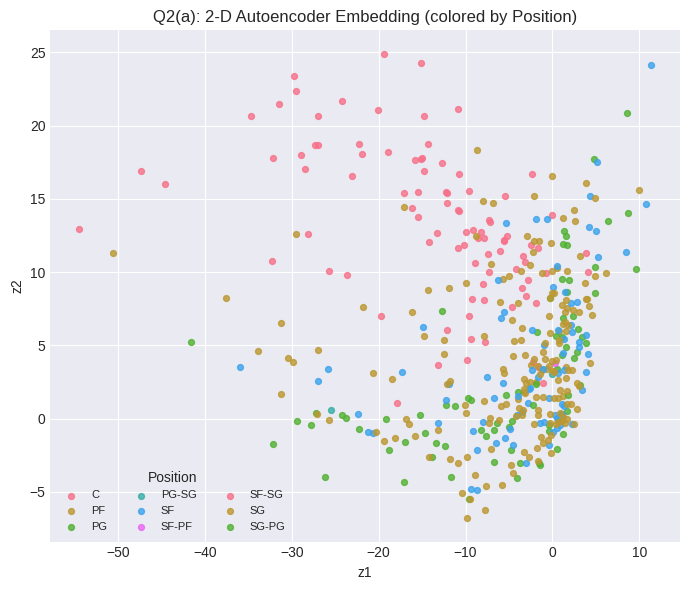

In [13]:
# Build 2-D codes for the filtered dataset
with torch.no_grad():
    X_all_s = scaler.transform(X)  # from your cleaned df_model
    Z2 = []
    for i in range(0, len(X_all_s), BATCH_SIZE):
        batch = torch.tensor(X_all_s[i:i+BATCH_SIZE], dtype=torch.float32, device=DEVICE)
        Z2.append(model_2d.encoder(batch).cpu().numpy())
    Z2 = np.vstack(Z2)  # shape (n_players_filtered, 2)

# Make a matplotlib scatter (renders nicely to PDF)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,6))
pos = (df_filtered['Position'] if 'df_filtered' in globals() and 'Position' in df_filtered.columns 
       else df['Position']).reset_index(drop=True)
for p in sorted(pos.unique()):
    m = (pos == p).values
    ax.scatter(Z2[m,0], Z2[m,1], s=18, label=p, alpha=0.8)
ax.set_title('Q2(a): 2-D Autoencoder Embedding (colored by Position)')
ax.set_xlabel('z1'); ax.set_ylabel('z2'); ax.legend(title='Position', ncols=3, fontsize=8)
plt.tight_layout()

# Load saved latent vectors (already computed above)
Z2 = np.load(LATENTS_OUT)  # shape (n_players_filtered, 2)
print(f"Loaded latent vectors: {Z2.shape}")

# Make a matplotlib scatter (renders nicely to PDF)import matplotlib.pyplot as pltfig, ax = plt.subplots(figsize=(7,6))pos = (df_filtered['Position'] if 'df_filtered' in globals() and 'Position' in df_filtered.columns        else df['Position']).reset_index(drop=True)for p in sorted(pos.unique()):    m = (pos == p).values    ax.scatter(Z2[m,0], Z2[m,1], s=18, label=p, alpha=0.8)ax.set_title('Q2(a): 2-D Autoencoder Embedding (colored by Position)')ax.set_xlabel('z1'); ax.set_ylabel('z2'); ax.legend(title='Position', ncols=3, fontsize=8)plt.tight_layout()

## References

1. Dataset: NBA 2022-23 Season Statistics
2. Libraries used: pandas, numpy, matplotlib, seaborn, plotly, scipy, sklearn
3. [Add any additional references used]